In [10]:
from sbox import AESSBox
import numpy as np
from juan_duarte.markov_utils import transition_matrix
from juan_duarte.markov_chain import DifferentialMarkovChain



box    = AESSBox()
#vec    = np.fromiter((box.apply(i) for i in range(256)), dtype=np.uint8)

# 8×8  ⇒  n_in = n_out = 8
vec = np.array([box.apply(i) for i in range(1 << box.input_size)], dtype=np.uint8)

P = transition_matrix(vec, n_in=8, n_out=8, skip_zero=True)

# 3. la cadena
chain = DifferentialMarkovChain(P, init="uniform")

print("∥πP-π∥₁   =", np.linalg.norm(chain.stationary_distribution() @ P
                                    - chain.stationary_distribution(), 1))
print("gap       =", chain.spectral_gap())
for r in range(1, 5):
    print(f"r={r}:  max P^r = {chain.max_probability(r):.3e}, "
          f"dTV = {chain.tv_distance(r):.3e}")
print("mezcla ε=2⁻²⁰ en", chain.mixing_time(eps=2**-20), "pasos")


∥πP-π∥₁   = 4.484260185400046e-16
gap       = 0.9358791572031624
r=1:  max P^r = 1.562e-02, dTV = 5.020e-01
r=2:  max P^r = 5.066e-03, dTV = 2.703e-02
r=3:  max P^r = 3.989e-03, dTV = 1.699e-03
r=4:  max P^r = 3.926e-03, dTV = 1.094e-04
mezcla ε=2⁻²⁰ en 15 pasos


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sbox import AESSBox
from juan_duarte.markov_utils import transition_matrix
from juan_duarte.markov_chain import DifferentialMarkovChain

box = AESSBox()                                   
vec = np.array([box.apply(i) for i in range(1 << box.input_size)], dtype=np.uint8)

P = transition_matrix(vec, n_in=box.input_size, n_out=box.output_size, skip_zero=True)

chain = DifferentialMarkovChain(P, init="uniform")

R_MAX    = 16                     # numero de pasos 
r_vals   = np.arange(1, R_MAX + 1)
max_prob = [chain.max_probability(r) for r in r_vals]
tv_dist  = [chain.tv_distance(r)     for r in r_vals]

print("De distribucion uniforme a distribucion uniforme :")
print("∥πP-π∥ =", np.linalg.norm(chain.stationary_distribution() @ P
                                    - chain.stationary_distribution(), 1))

print("\nEL segundo valor propio mas grande es:")
print(f"Spectral gap γ = {chain.spectral_gap():.3f}")


De distribucion uniforme a distribucion uniforme :
∥πP-π∥₁   = 4.484260185400046e-16

EL segundo valor propio mas grande es:
Spectral gap γ = 0.936


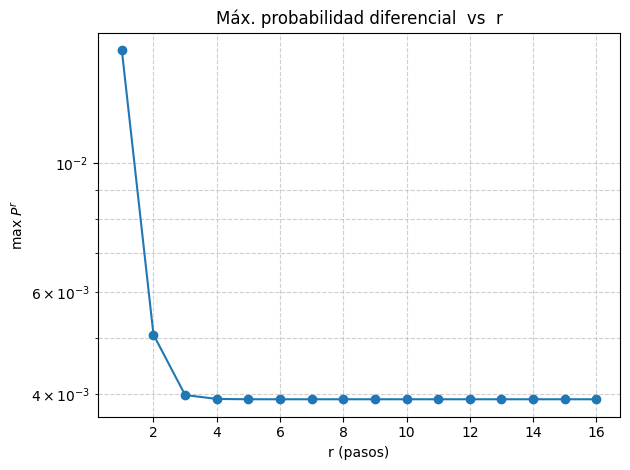

In [12]:
# ---  máxima probabilidad diferencial ---
plt.figure()
plt.plot(r_vals, max_prob, marker="o")
plt.yscale("log")
plt.title("Máx. probabilidad diferencial  vs  r")
plt.xlabel("r (pasos)")
plt.ylabel("max $P^r$")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()


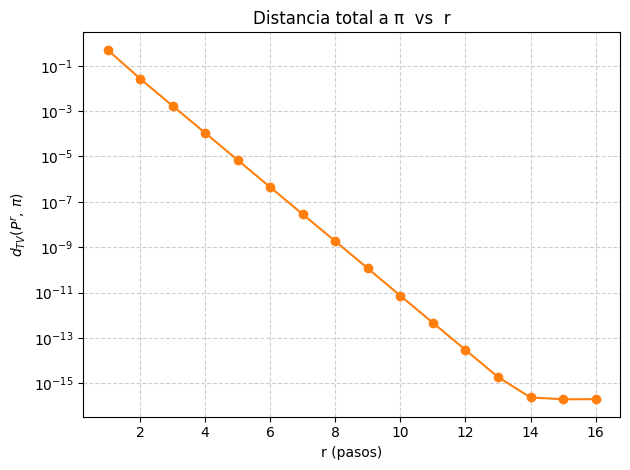

In [13]:
# --- distancia total a la distribución estacionaria ---
plt.figure()
plt.plot(r_vals, tv_dist, marker="o", color="tab:orange")
plt.yscale("log")
plt.title("Distancia total a π  vs  r")
plt.xlabel("r (pasos)")
plt.ylabel("$d_{TV}(P^r,\\,π)$")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

r |  maxProb   |  dTV
------------------------------
 0| 1.0000e+00 | 9.9608e-01
 1| 1.5625e-02 | 5.0196e-01
 2| 4.6387e-03 | 2.5475e-02
 3| 3.9635e-03 | 1.6109e-03
 4| 3.9240e-03 | 1.0160e-04
 5| 3.9217e-03 | 6.4685e-06
 6| 3.9216e-03 | 4.1729e-07
 7| 3.9216e-03 | 2.6810e-08
 8| 3.9216e-03 | 1.6462e-09
 9| 3.9216e-03 | 1.0614e-10
10| 3.9216e-03 | 6.6468e-12
11| 3.9216e-03 | 4.2552e-13
12| 3.9216e-03 | 2.7112e-14
13| 3.9216e-03 | 1.7217e-15
14| 3.9216e-03 | 1.3704e-16
15| 3.9216e-03 | 1.0105e-16
16| 3.9216e-03 | 1.7998e-16


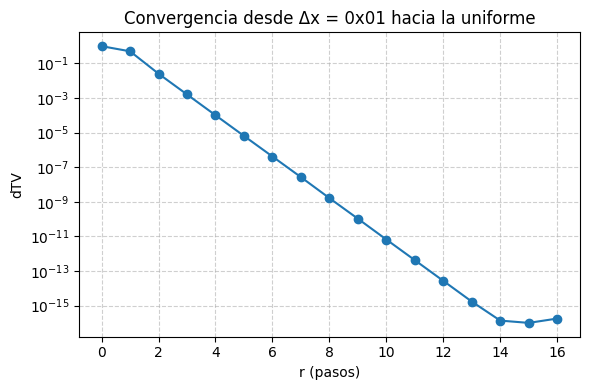

In [16]:

box    = AESSBox()
#vec    = np.fromiter((box.apply(i) for i in range(256)), dtype=np.uint8)

# 8×8  ⇒  n_in = n_out = 8
vec = np.array([box.apply(i) for i in range(1 << box.input_size)], dtype=np.uint8)

P = transition_matrix(vec, n_in=8, n_out=8, skip_zero=True)

k = P.shape[0]
uniform_pi = np.full(k, 1/k)
pi0 = np.zeros(k); pi0[0]=1.

R_MAX=16; 
tv=[]; mp=[]; cur=pi0.copy()
for r in range(R_MAX+1):
    tv.append(0.5*np.abs(cur-uniform_pi).sum())
    mp.append(cur.max())
    if r<R_MAX: cur = cur @ P

print("r |  maxProb   |  dTV")
print("-"*30)
for r,(p,d) in enumerate(zip(mp,tv)):
    print(f"{r:2d}| {p:10.4e} | {d:10.4e}")

plt.figure(figsize=(6,4))
plt.plot(range(R_MAX+1), tv, marker="o")
plt.yscale("log"); plt.grid(True, ls="--", alpha=0.6)
plt.xlabel("r (pasos)"); plt.ylabel("dTV")
plt.title("Convergencia desde Δx = 0x01 hacia la uniforme")
plt.tight_layout()
plt.show()